In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coupe_1 = ['2.B53', '2.B54', '2.B55', '2.B56']
coupe_2 = ['2.B57', '2.B58', '2.B59', '2.B60']

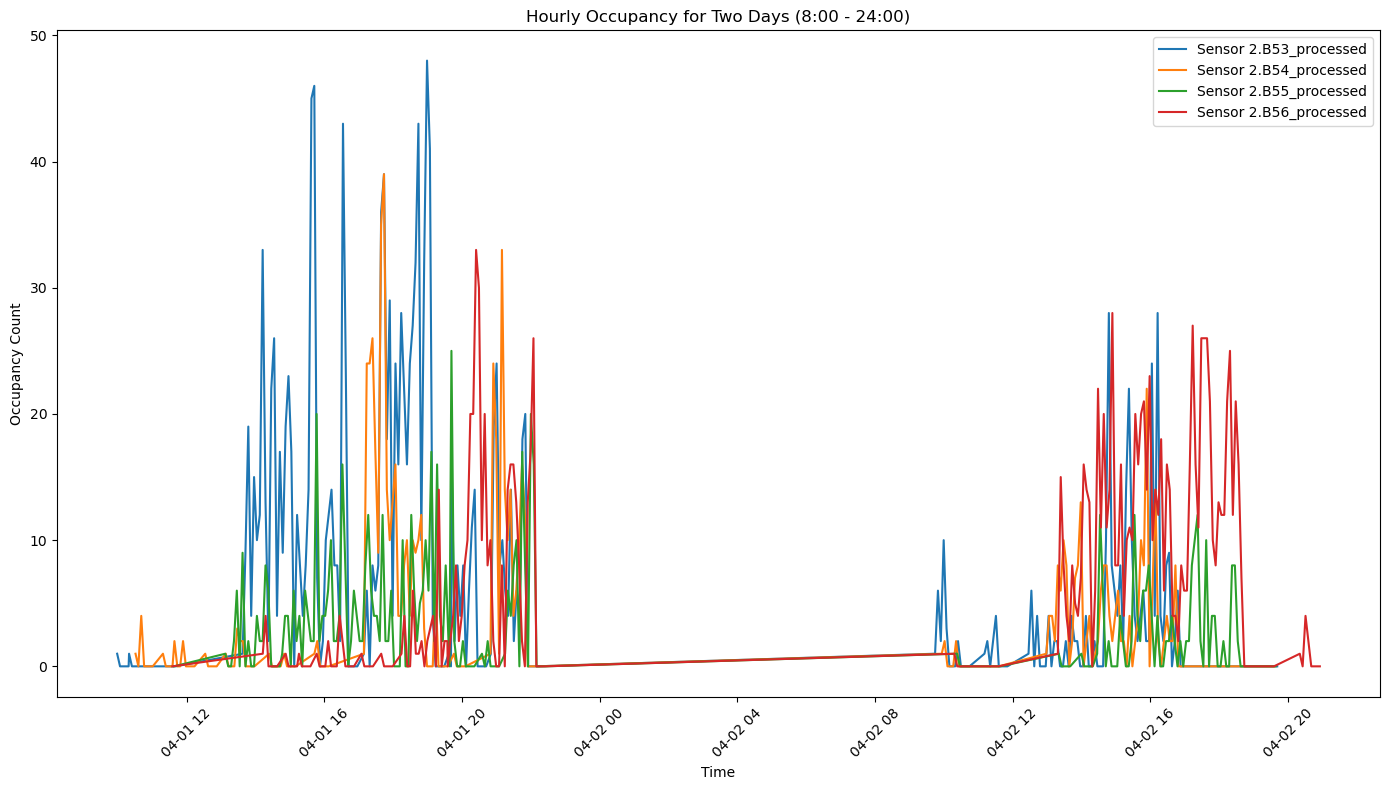

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of sensor file names
sensors = ['2.B53_processed', '2.B54_processed', '2.B55_processed', '2.B56_processed']
input_folder = 'Data_clean/Locus_sensors/'

# Initialize an empty list to store dataframes for each sensor
dfs = []

# Read and process data for each sensor
for sensor in sensors:
    # Read the data
    df = pd.read_excel(input_folder + f'{sensor}.xlsx')
    
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Filter data to include only hours from 8 to 24
    df = df[df['Date'].dt.hour.between(8, 24)]
    
    # Select one day to zoom in
    day_to_zoom = df['Date'].dt.date.unique()[0]  # Select the first day for simplicity
    
    # Filter data for the selected day and the next day
    selected_days_data = df[df['Date'].dt.date.isin([day_to_zoom, day_to_zoom + pd.Timedelta(days=1)])]
    
    # Group by day and hour to calculate the occupancy
    hourly_occupancy = selected_days_data.groupby(['Date'])['Count'].sum().reset_index()
    
    # Add the hourly occupancy data for the sensor to the list
    dfs.append(hourly_occupancy)

# Concatenate data for all sensors into a single dataframe
combined_data = pd.concat(dfs, ignore_index=True)

# Plot the data
plt.figure(figsize=(14, 8))
for i, df in enumerate(dfs):
    plt.plot(df['Date'], df['Count'], label=f'Sensor {sensors[i]}')

plt.xlabel('Time')
plt.ylabel('Occupancy Count')
plt.title('Hourly Occupancy for Two Days (8:00 - 24:00)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


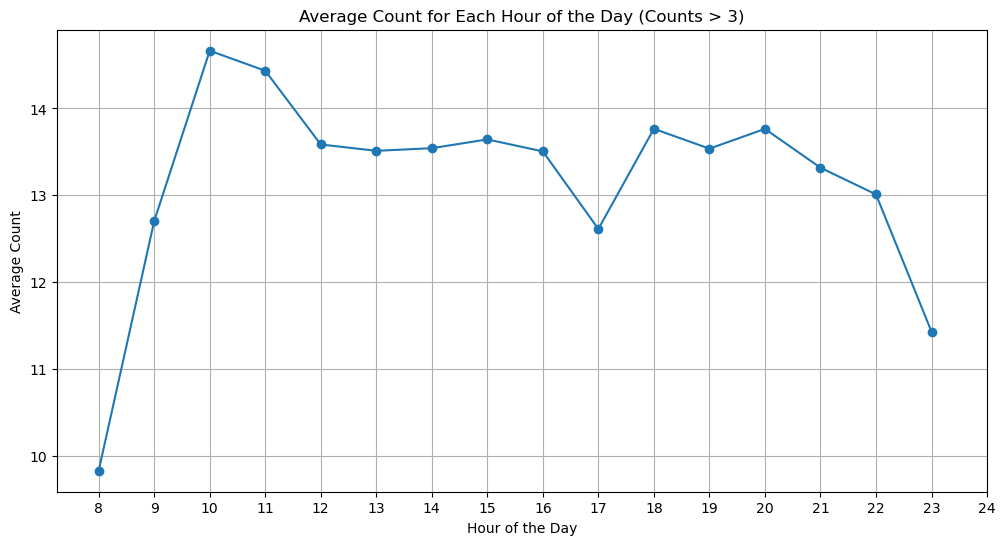

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data from the file
file_path = 'Data_clean/Locus_sensors/2.B53_processed.xlsx'
df = pd.read_excel(file_path)
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows where 'Count' is NaN
df = df.dropna(subset=['Count'])

# Filter the data to include only hours between 8 and 24
df = df[(df['Date'].dt.hour >= 8) & (df['Date'].dt.hour <= 24)]

# Filter out counts less than or equal to 3
df = df[df['Count'] > 3]

# Create a new column for the hour
df['Hour'] = df['Date'].dt.hour

# Group by 'Hour' and calculate the average count
df_grouped = df.groupby('Hour')['Count'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped, marker='o', linestyle='-')
plt.title('Average Count for Each Hour of the Day (Counts > 3)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(8, 25))
plt.grid(True)
plt.show()